Team members:

Geson Chong

Kalyan Madanapalli

Bret Tomko

*Final Result*

Below is our solution to the 5 W's:

Who: Chaney Sean Fuentes (User_id: CSF0929)

What: The production line working conditions.

When: July 14th, 2017.

Where: Physical Environment: Mr. Fuentes' computer (id: PC-4442)
        Virtual Environment: Wikileaks

Why:  He wanted to expose the bad working conditions for the production line workers and wanted to go to Disneyland out of it.

To begin, we first checked the employees that were fired. We then transitioned to calculating the suspicious values for all employees. Using this, we noticed that production line workers in general had high suspicious values. Noticing that emails were sent to news organizations from mostly production line workers, we assumed they were trying to sell a story. From this, we went back to the fired list and found the fired production line workers, where we found Chaney. We looked at Chaney's web history and used TFIDF to find unique websites that stood out from the rest (for each day). Immediately, we noticed wikileaks which was a few days before his termination. We know wikileaks is associated with data leaking and that Mr. Fuentes used wikileak's upload feature. In addition, the next day, he went to go.com which indicates his desire to go to Disneyland with the sellout money he made.

Attribution Listing:  
We all met up in one place and did pair programming to complete this project.

Current Hypothesis:


Since the premise of this project was to solve a mystery, we thought that a person being fired may be a good enough reason to do such a thing (This may be part of the why). Due to this, we looked at the people that was fired between the months of May and November. We found that 36 people were not employed for the span between May and November. This list of people gave us a good starting point to look at. We then looked at what interactions these people may have in the other sections.

1) If an employee has been fired and is still communicating with people still within the company, that employee is more suspicious.

2) If a supervisor has a pattern of firing people, the supervisor can be classified as suspicious.

We thought a user accessing multiple computers could be suspicious as he might be accessing private information. We also figured connecting/disconnecting usb device at non-standard hours would be fishy since the suspect would be alone and could upload/download private information not meant for him.

3) If an employee has accessed multiple computers, then the employee is considered to be more suspicious than a user that hasn’t accessed as many computers. 

4) If an employee is using a usb device during non-standard work hours, then the employee is considered to be more suspicious.

Since there are many jobs that cause an employee to have continuous suspicious behavior, we thought it would be a good idea to find employees that are normally not suspicious but became suspicious for a short while before returning to normal activity.

5) If an employee is consistently suspicious throughout their whole employment then they are most likely not involved in this incident (same for someone who is consistently NOT suspicious).

6) If an employee has lots of changes from low suspicion to high suspicion this could be a good suspect to look at more closely.

7) If an employee who was mostly not suspicious from most of his employment becomes suspicious for a while before returning back to normal is likely involved in the incident.

Looking at the number of suspicious activities per day showed a huge spike on 08/16/2017, something probably occurred on this day or the days leading up to it.

What we plan to do next:

Create a list of employees that interesect all the hypotheses
    

In [1]:
import pandas
import numpy
import matplotlib.pyplot
import datetime
%matplotlib inline
# Data files:
device = pandas.read_csv('device_info.csv')
email = pandas.read_csv('email_info.csv')
employee = pandas.read_csv('employee_info.csv')
http = pandas.read_csv('http_info.csv')
logon = pandas.read_csv('logon_info.csv')

Our first set of suspects we looked at were people that were fired and also at thier supervisors. We quickly saw that this on its own was not enough to figure out who to focus on. However we can compare future analytics against this list to help us validate our suspicions

In [2]:
user_ids = numpy.unique(employee.user_id)
month = [""] * len(user_ids)
fired_date = pandas.DataFrame()
fired_date["user_id"] = user_ids
fired_date["month"] = month
fired_date = fired_date.set_index("user_id")

for i in range(0, len(employee)):
    currentRow = employee.iloc[i,:]
    fired_date.loc[currentRow.user_id].month = currentRow.month
    
people_fired = fired_date[fired_date.month != "11/1/17"].copy()

In [3]:
names = []
supervisor = []
for i in people_fired.index.get_values():
    hold = employee[employee.user_id == i]
    names.append(hold.employee_name.iloc[0])
    supervisor.append(hold.supervisor.iloc[0])

people_fired["name"] = names
people_fired["supervisor"] = supervisor
people_fired

,month,name,supervisor
user_id,,,
CCD0463,9/1/17,Chancellor Cody Douglas,Bo Mira Dillard
CCH0959,9/1/17,Cedric Cyrus Harrison,Desiree Claudia Booth
CCO0065,6/1/17,Carson Caesar Olson,Carl Scott Hooper
CLN1234,5/1/17,Chris L North,Emmanuel Casey Wiggins
CSF0929,7/1/17,Chaney Sean Fuentes,Theodore Upton Barry
DBM0279,10/1/17,Dane Bert Mcfadden,Nadine Anjolie Gregory
DHB0696,10/1/17,Damon Hyatt Boyle,Castor Chaim Combs
DSL0441,9/1/17,Denise Serina Le,Brenna Martha Russell
DZJ0261,5/1/17,Dominic Zeph Johns,Evan Bevis Colon


In [4]:
supervisor_fire_count = pandas.DataFrame(people_fired.groupby("supervisor").count())
del supervisor_fire_count["name"]
supervisor_fire_count.rename(columns = {"month" : "Amount of people Fired"}, inplace=True)
supervisor_fire_count

,Amount of people Fired
supervisor,
Abraham Perry Reyes,2
Ann Hannah Dickerson,1
Bo Mira Dillard,2
Brenna Martha Russell,1
Carl Scott Hooper,1
Castor Chaim Combs,4
Dennis Carson Mendoza,1
Desiree Claudia Booth,1
Emmanuel Casey Wiggins,1


The next set of data that we decided to analyze was activity that occured outside of the normal work day. And again by its self we could not see any clear path to continue our investigation from just this data but will be usefull in documenting all suspicious activities of the employes.

In [5]:
strangeEarly = datetime.datetime.strptime("06:00:00", '%H:%M:%S')
strangeLate = datetime.datetime.strptime("18:00:00", '%H:%M:%S')

In [6]:
email
emailOffHours = email
emailOffHours["offHours"] = [(datetime.datetime.strptime(x.split(" ")[1],'%H:%M:%S') < strangeEarly) or (datetime.datetime.strptime(x.split(" ")[1],'%H:%M:%S') > strangeLate)  for x in emailOffHours.date]
emailOffHours = emailOffHours[emailOffHours.offHours]
emailOffHours["day"] = [x.split(" ")[0] for x in emailOffHours.date]
emailOffHours

/home/kalyan/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,id,date,to,from,size,attachments,offHours,day
192,{D2K9-X5BM85YZ-8763NFGL},05/01/2017 18:06:56,MacKenzie.Yael.Beasley@dtaa.com,Ashely.Violet.Joyner@dtaa.com,17389,0,True,05/01/2017
193,{Y1W9-M4YV21OM-4372WKBS},05/01/2017 18:10:37,Sarah.Rhonda.Flowers@hp.com,Ivy.Hiroko.Sears@dtaa.com,23867,0,True,05/01/2017
194,{T2L5-K6AG08WS-3405LOTE},05/01/2017 18:12:53,Christian.Thomas.Copeland@dtaa.com,Whitney.Melissa.Harrington@dtaa.com,23240,0,True,05/01/2017
195,{P1L8-Z3JW07BC-7263CZBA},05/01/2017 18:30:49,Jolene.Martha.Blake@dtaa.com;Martin.Jonathan.M...,Ashely.Violet.Joyner@dtaa.com,58161,0,True,05/01/2017
196,{B1T0-E5FX33JQ-7166ODSN},05/01/2017 18:37:11,Garrett.Nehru.Gordon@dtaa.com,Sarah.Penelope.Duffy@dtaa.com,24778,2,True,05/01/2017
197,{H7X6-O0FG25ZX-1387ZWYZ},05/01/2017 18:49:05,Octavius.Evan.Henderson@dtaa.com,Garrett.Nehru.Gordon@dtaa.com,17496,0,True,05/01/2017
198,{A3G8-E3RX53CI-5484YIKD},05/01/2017 19:08:05,Paula.Delilah.Barnett@dtaa.com,Kadeem.Troy.Randolph@dtaa.com,33599,0,True,05/01/2017
199,{F3Y8-X0OO57ST-8528XDIB},05/01/2017 19:11:18,Ezekiel.David.Waters@charter.net,Ashely.Violet.Joyner@dtaa.com,28465,0,True,05/01/2017
200,{C6U5-R5JV94GJ-0378USWC},05/01/2017 19:38:23,Palmer.Josiah.Young@dtaa.com;Nolan.Richard.Bla...,Kadeem.Troy.Randolph@dtaa.com,17528,0,True,05/01/2017
429,{I9N9-F8IM91HJ-6771RJKT},05/02/2017 18:01:46,Kamal.Judah.Fox@dtaa.com;Kiara.Astra.Small@dta...,Drake.Ivan.Mejia@dtaa.com,23556,3,True,05/02/2017


In [7]:
device
deviceOffHours = device
deviceOffHours["offHours"] = [(datetime.datetime.strptime(x.split(" ")[1],'%H:%M:%S') < strangeEarly) or (datetime.datetime.strptime(x.split(" ")[1],'%H:%M:%S') > strangeLate)  for x in deviceOffHours.date]
deviceOffHours = deviceOffHours[deviceOffHours.offHours]
deviceOffHours["day"] = [x.split(" ")[0] for x in deviceOffHours.date]
deviceOffHours

/home/kalyan/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,id,date,user,pc,activity,offHours,day
0,{I2V5-T9ZT91EI-5555HLGW},05/01/2017 01:58:03,CJP0221,PC-5941,Connect,True,05/01/2017
1,{H4T5-R0QA68FQ-3925ELGY},05/01/2017 03:08:32,CJP0221,PC-5941,Disconnect,True,05/01/2017
247,{B2U5-M5GN78VM-5665JJYG},05/01/2017 18:10:12,NUG0614,PC-9225,Disconnect,True,05/01/2017
248,{Z5D7-G5NX70WA-0743TYCN},05/01/2017 18:23:20,AVJ0078,PC-8277,Disconnect,True,05/01/2017
249,{H0G0-J7SV49SJ-6143BBEG},05/01/2017 19:21:45,YAP0560,PC-2685,Disconnect,True,05/01/2017
520,{T6S4-S4MM18YC-7616LDBY},05/02/2017 18:23:35,AYN0502,PC-9878,Connect,True,05/02/2017
521,{S8N0-D4FR71TY-1112BEPP},05/02/2017 18:27:46,AYN0502,PC-9878,Disconnect,True,05/02/2017
522,{N9Z0-J0EN38GJ-6242MCIM},05/02/2017 18:33:35,ERL0366,PC-0472,Disconnect,True,05/02/2017
1620,{R7M5-V0PE66RD-9744HHAF},05/03/2017 18:03:19,CHH0472,PC-0281,Disconnect,True,05/03/2017
1621,{I5P8-Q4HT82VE-8705JGLQ},05/03/2017 18:05:17,AUS0564,PC-5201,Disconnect,True,05/03/2017


In [8]:
logon
logonOffHours = logon
logonOffHours["offHours"] = [(datetime.datetime.strptime(x.split(" ")[1],'%H:%M:%S') < strangeEarly) or (datetime.datetime.strptime(x.split(" ")[1],'%H:%M:%S') > strangeLate)  for x in logonOffHours.date]
logonOffHours = logonOffHours[logonOffHours.offHours]
logonOffHours["day"] = [x.split(" ")[0] for x in logonOffHours.date]
logonOffHours

/home/kalyan/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,id,date,user,pc,activity,offHours,day
0,{K8A8-I1AQ11TY-7196UJHA},05/01/2017 01:23:57,CJP0221,PC-5941,Logon,True,05/01/2017
1,{S3C5-M7TU17OX-7669DAXE},05/01/2017 01:26:20,MDS0121,PC-8374,Logoff,True,05/01/2017
2,{T7N1-I7WL82DR-7030FPGD},05/01/2017 01:52:58,HMD0974,PC-1182,Logon,True,05/01/2017
3,{J0N0-P3IC26YQ-5468CCLR},05/01/2017 02:11:56,SLC0113,PC-1851,Logon,True,05/01/2017
4,{H5O1-F5SI20WW-0774IILV},05/01/2017 02:15:16,JAO0817,PC-0583,Logoff,True,05/01/2017
5,{Q4Y5-F5IL58JP-1044LYKY},05/01/2017 02:32:00,TJR0895,PC-1413,Logoff,True,05/01/2017
6,{F4U4-E0UI82LQ-8119AMMC},05/01/2017 03:12:31,CJP0221,PC-5941,Logoff,True,05/01/2017
7,{P9Z0-Y4RZ63HY-0768IYMZ},05/01/2017 03:22:34,SLC0113,PC-1851,Logoff,True,05/01/2017
8,{O0I4-I1HB68CO-4104OZPU},05/01/2017 03:32:00,DWG0209,PC-9532,Logon,True,05/01/2017
9,{F1O2-K9TW49XY-4608HUOH},05/01/2017 03:42:41,DWG0209,PC-9532,Logoff,True,05/01/2017


In [9]:
http
httpOffHours = http
httpOffHours["offHours"] = [(datetime.datetime.strptime(x.split(" ")[1],'%H:%M:%S') < strangeEarly) or (datetime.datetime.strptime(x.split(" ")[1],'%H:%M:%S') > strangeLate)  for x in httpOffHours.date]
httpOffHours = httpOffHours[httpOffHours.offHours]
httpOffHours["day"] = [x.split(" ")[0] for x in httpOffHours.date]
httpOffHours

/home/kalyan/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,id,date,user,pc,url,offHours,day
0,{Y1V0-L9KP13HO-2886FNBQ},05/01/2017 00:00:36,MDS0121,PC-8374,http://yahoo.com/Armillaria_luteobubalina/mont...,True,05/01/2017
1,{J8C2-W3PL21WD-1786TWQY},05/01/2017 00:35:50,JAO0817,PC-0583,http://instagr.am/1955_MacArthur_Airport_Unite...,True,05/01/2017
2,{Y8Q3-W0WO94DN-1072IWFA},05/01/2017 01:02:45,JAO0817,PC-0583,http://reference.com/Achtung_Baby/u2s.html,True,05/01/2017
3,{W5H5-N4HW07MA-1950QCOZ},05/01/2017 03:03:35,CJP0221,PC-5941,http://target.com/Dungeons__Dragons/gygax.html,True,05/01/2017
4,{V3H3-O1WG29GS-8147SAJB},05/01/2017 03:06:41,SLC0113,PC-1851,http://foodnetwork.com/1955_MacArthur_Airport_...,True,05/01/2017
5,{P4P8-K7ZC85EU-3559TSQU},05/01/2017 03:12:50,SLC0113,PC-1851,http://toysrus.com/1994_Atlantic_hurricane_sea...,True,05/01/2017
6,{Z0P7-A9QX52PK-3761TDMK},05/01/2017 03:13:44,WMH0866,PC-9974,http://youtube.com/2004_World_Series/varitek.html,True,05/01/2017
7,{F3W5-M6LJ91GN-9315XVER},05/01/2017 04:59:16,LHC0329,PC-6480,http://hootsuite.com/Mercury_planet/antoniadis...,True,05/01/2017
8,{O9D3-H8SR07MC-1436KREP},05/01/2017 05:40:33,ASN0508,PC-8529,http://expedia.com/1964_Brinks_Hotel_bombing/b...,True,05/01/2017
9,{N4H9-Z8HV04NE-5299CBMO},05/01/2017 05:53:05,ASN0508,PC-8529,http://cnet.com/2000_Sri_Lanka_cyclone/thoothu...,True,05/01/2017


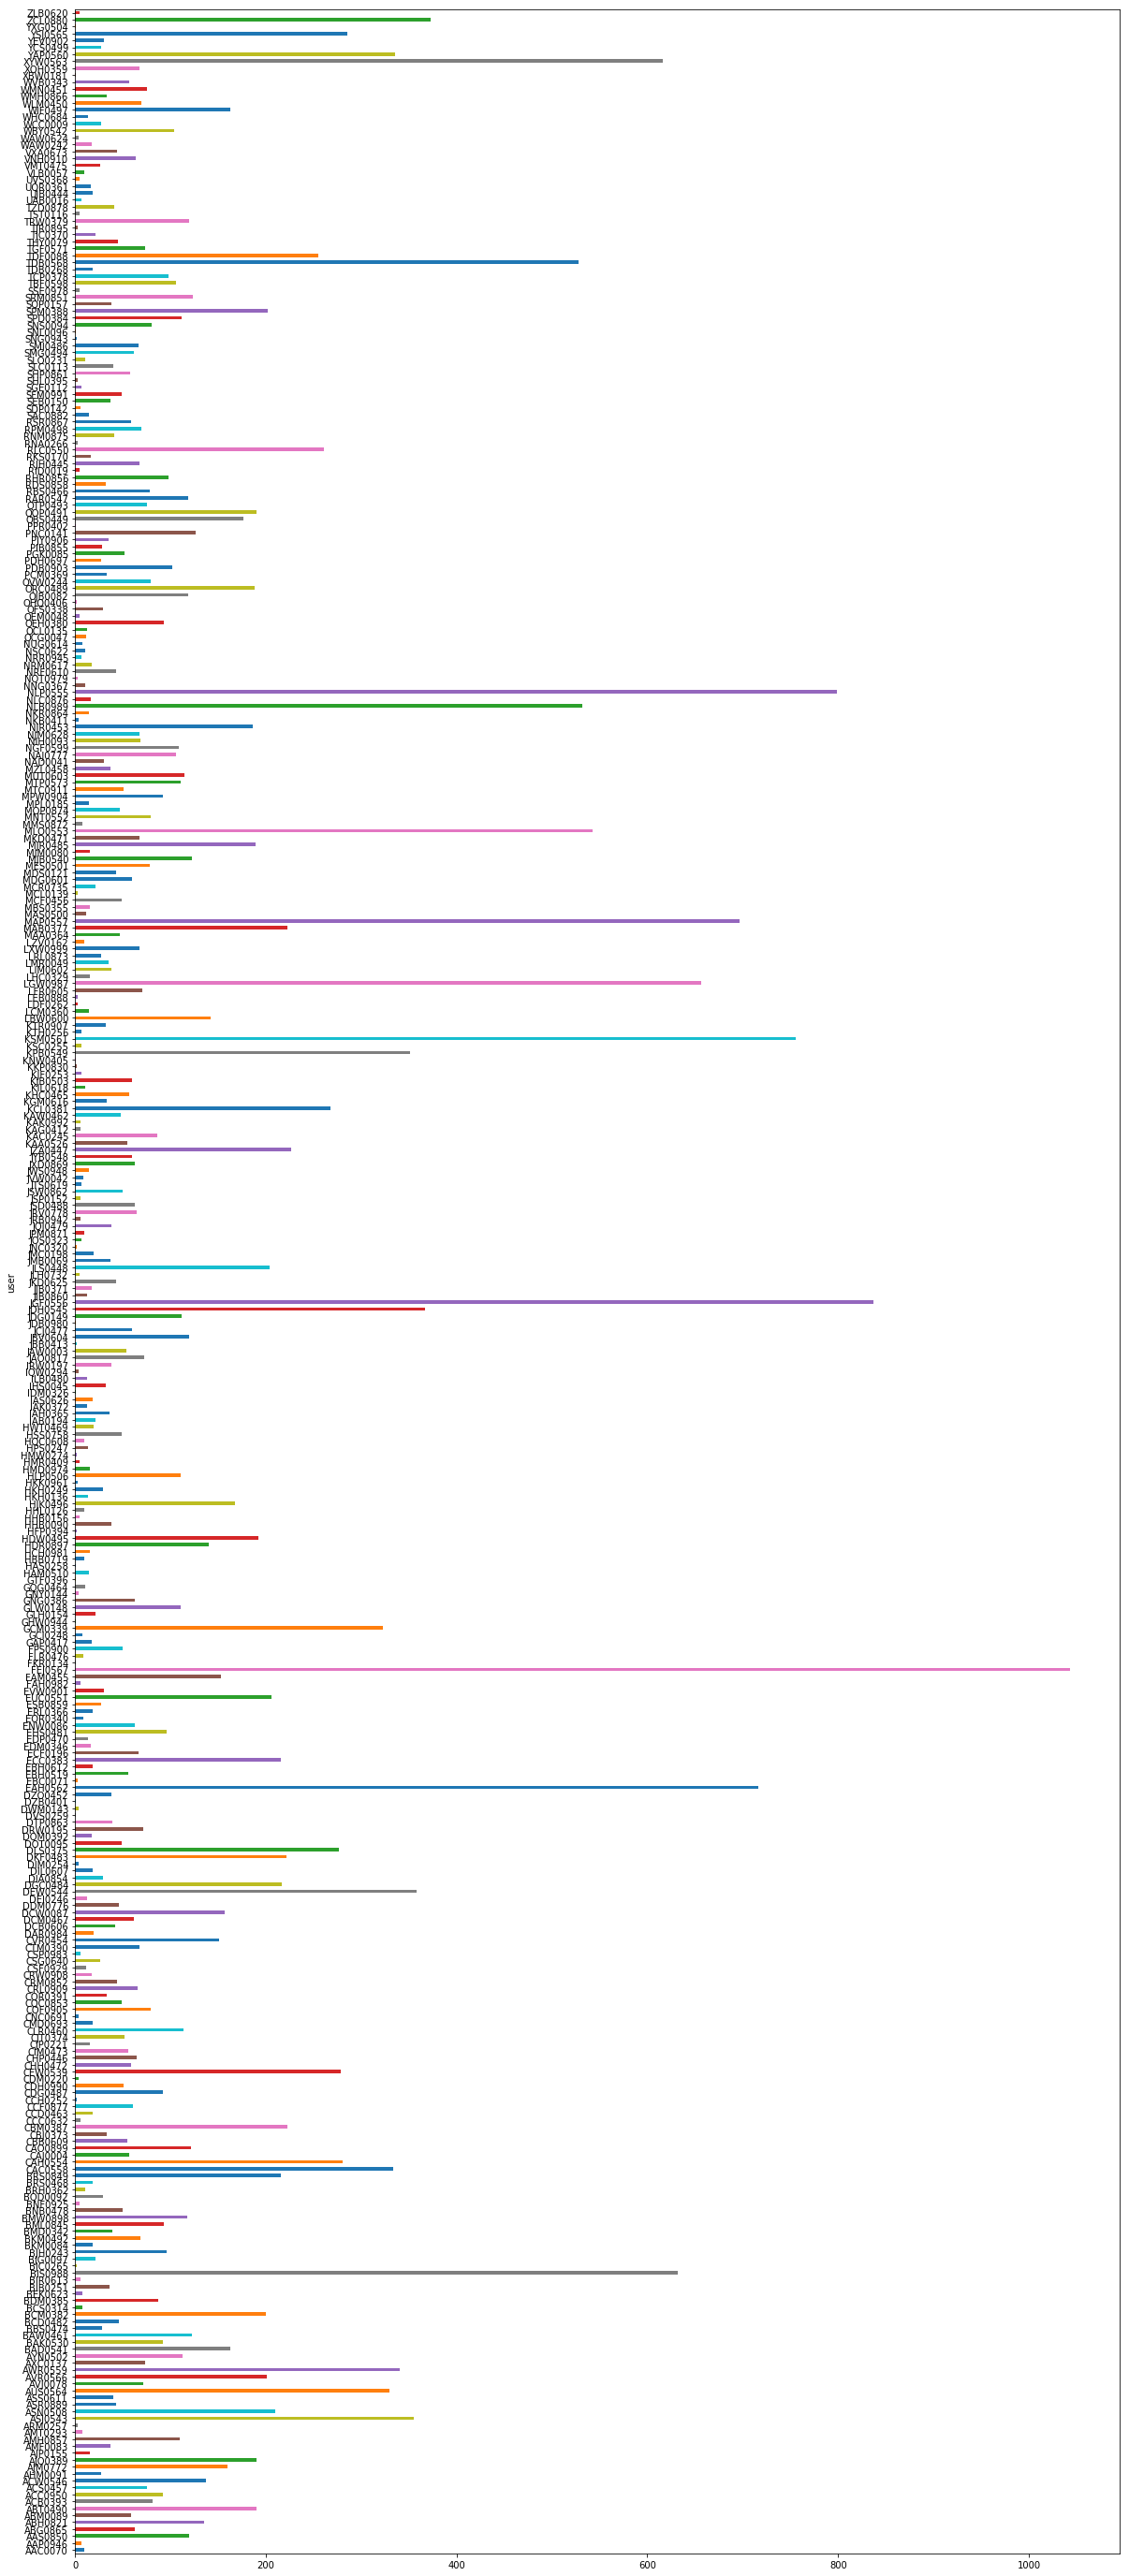

In [10]:
httpOffHours.iloc[:,:].groupby("user").day.count().plot.barh(figsize=(20,50))

Building off of the last idea we decided to look at every record and mark down if suspicious activites occured, for now it is just a 1 if it occured and a 0 if it did not occur but in the future we can change it to be < 1 if an event occured and the user's job make sense for them to be causing that event (e.x. itadmins will have smaller number for working outside of work hours). 

In [11]:
susEmail = email.copy()
susEmail["offHours"] = [(datetime.datetime.strptime(x.split(" ")[1],'%H:%M:%S') < strangeEarly) or (datetime.datetime.strptime(x.split(" ")[1],'%H:%M:%S') > strangeLate)  for x in susEmail.date]
susEmail["outside"] = [(not("@dtaa.com" in x)) for x in susEmail.to]
eToU = dict(zip(employee.email, employee.user_id))
uToE = dict(zip(employee.user_id, employee.email))
susEmail["user"] = [eToU[x] for x in susEmail.iloc[:,3]]

In [12]:
susHttp = http.copy()
susHttp["offHours"] = [(datetime.datetime.strptime(x.split(" ")[1],'%H:%M:%S') < strangeEarly) or (datetime.datetime.strptime(x.split(" ")[1],'%H:%M:%S') > strangeLate)  for x in susHttp.date]
susHttp["money"] = [ ("bank" in x) or ("pay" in x)  for x in susHttp.url]

In [13]:
susLogon = logon.copy()
susLogon["offHours"] = [(datetime.datetime.strptime(x.split(" ")[1],'%H:%M:%S') < strangeEarly) or (datetime.datetime.strptime(x.split(" ")[1],'%H:%M:%S') > strangeLate)  for x in susLogon.date]

In [14]:
susDevice = device.copy()
susDevice["offHours"] = [(datetime.datetime.strptime(x.split(" ")[1],'%H:%M:%S') < strangeEarly) or (datetime.datetime.strptime(x.split(" ")[1],'%H:%M:%S') > strangeLate)  for x in susDevice.date]

In [15]:
susHttp["offHours"] = susHttp["offHours"].apply(float)
susHttp["money"] = susHttp["money"].apply(float)
susEmail["offHours"] = susEmail["offHours"].apply(float)
susEmail["outside"] = susEmail["outside"].apply(float)
susLogon["offHours"] = susLogon["offHours"].apply(float)
susDevice["offHours"] = susDevice["offHours"].apply(float)
susHttp["day"] = [x.split(" ")[0] for x in susHttp.date]
susEmail["day"] = [x.split(" ")[0] for x in susEmail.date]
susLogon["day"] = [x.split(" ")[0] for x in susLogon.date]
susDevice["day"] = [x.split(" ")[0] for x in susDevice.date]


Then we looked at the people with the most suspicious activity overall

In [16]:
df = pandas.DataFrame(susLogon.groupby("user").offHours.sum())
df.rename(columns={"day": "logon"}, inplace=True)
df["http"] = susHttp.groupby("user").offHours.sum() + susHttp.groupby("user").money.sum()
df["email"] = susEmail.groupby("user").offHours.sum() + susEmail.groupby("user").outside.sum()
df["device"] = susDevice.groupby("user").offHours.sum()

df = df.fillna(0.0)
df["sum"] = df.sum(axis=1)
df = df.sort_values("sum", ascending=False)

Lastly for this analytics we decided to look at the top X suspicious people and look at thier mean suspicion for each day and the days prior. The idea here is to ignore people who are always supicious and to look for people who wernt suspicious who became suspicious then went back to not being suspicious, they might be involved in the incident and it could give us a timeframe for the incident also. 

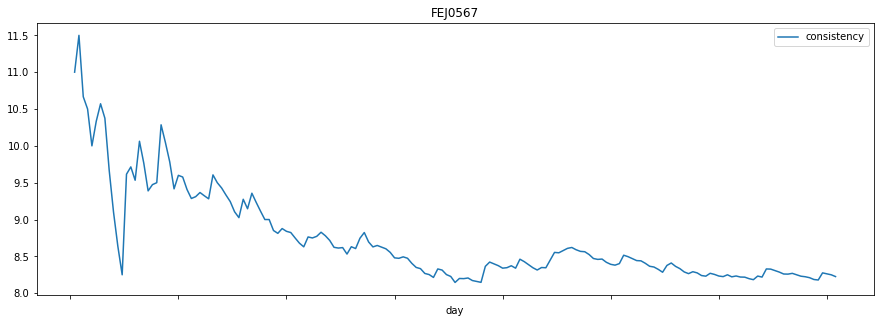

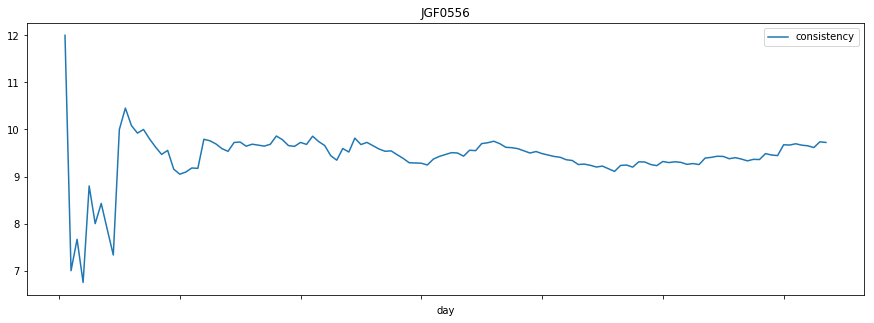

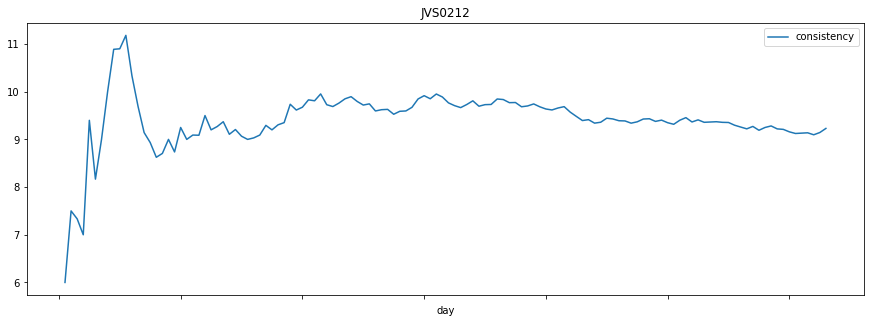

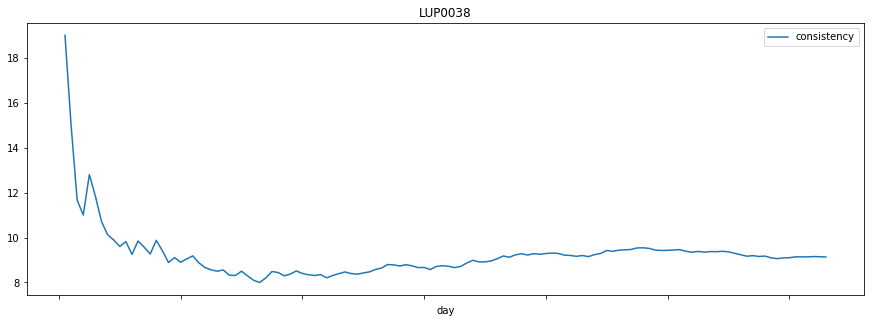

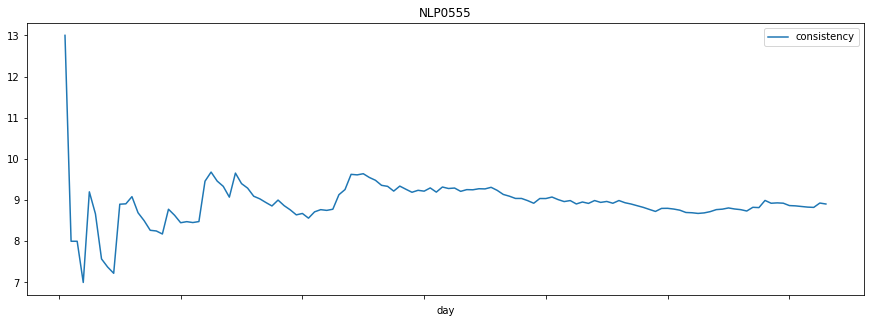

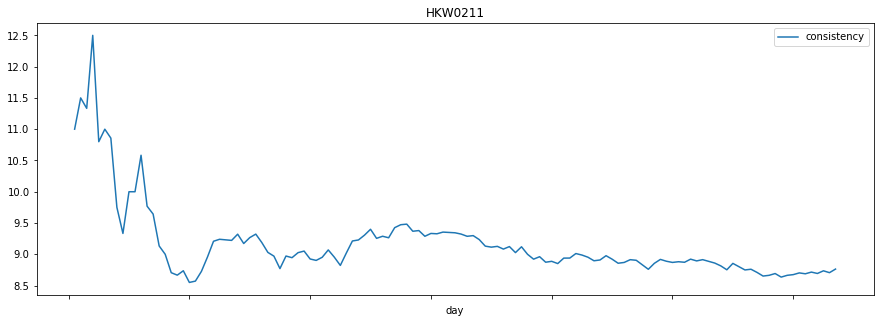

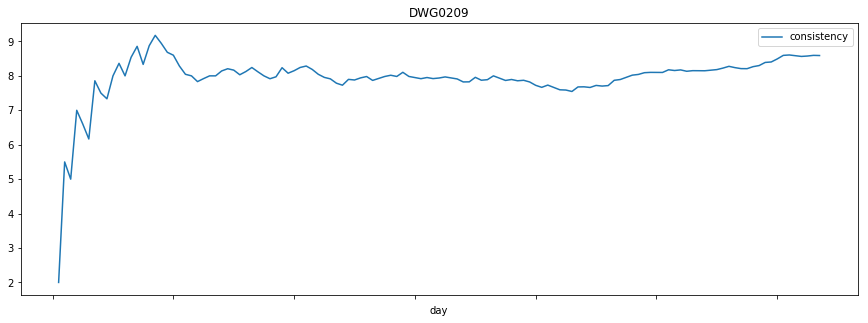

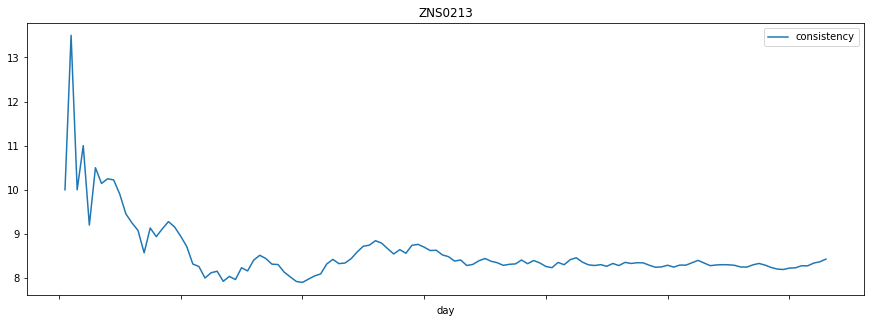

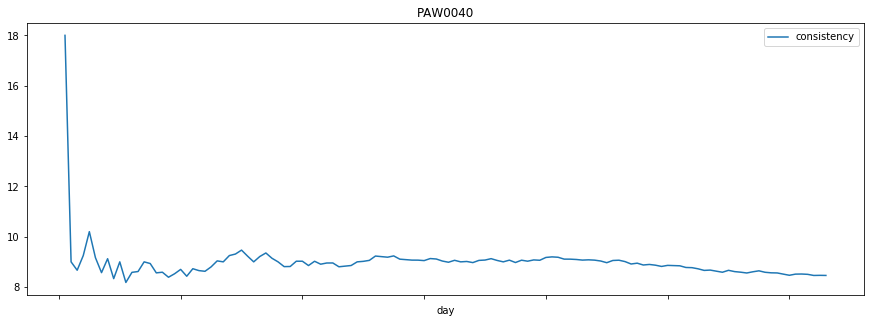

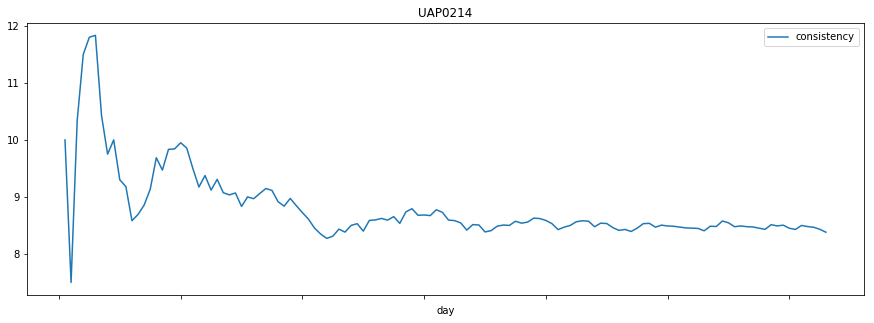

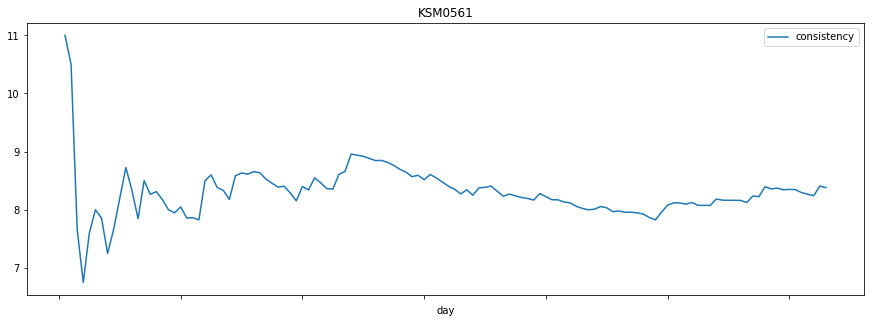

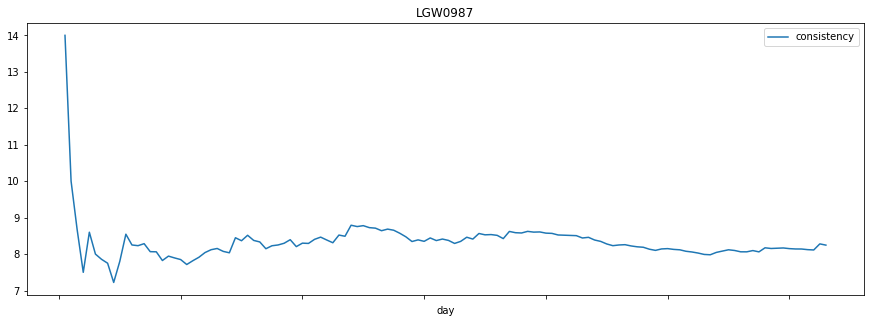

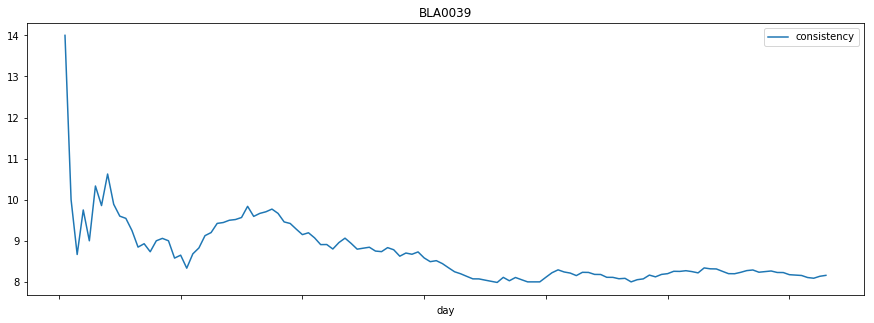

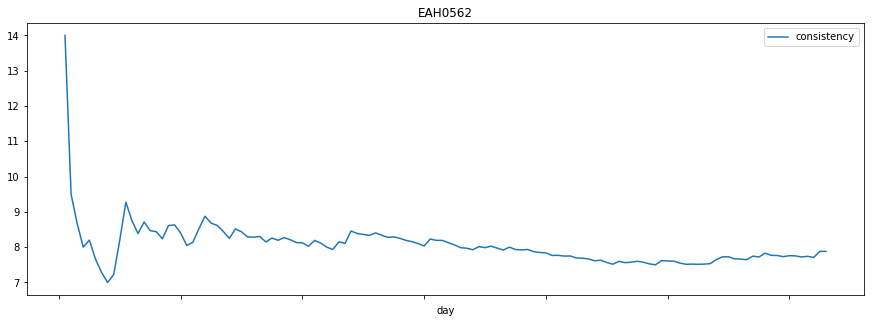

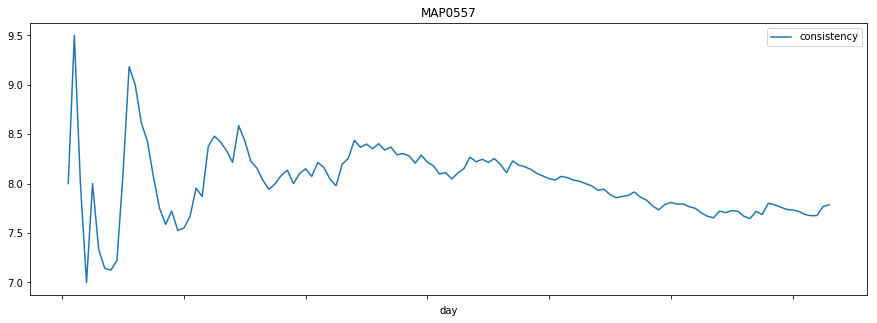

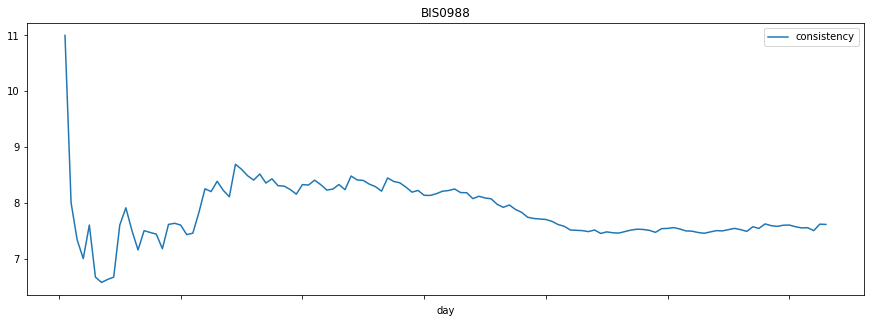

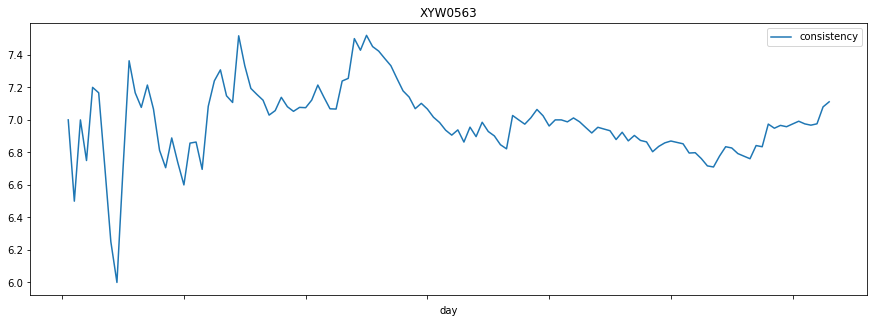

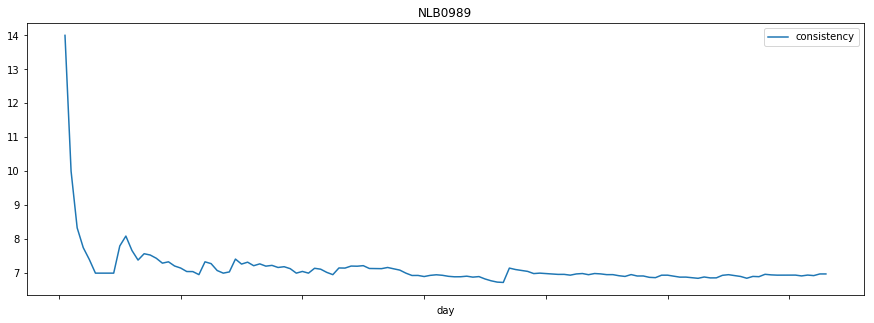

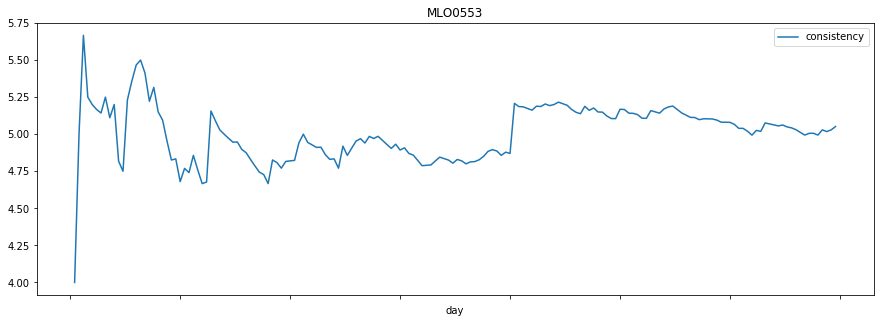

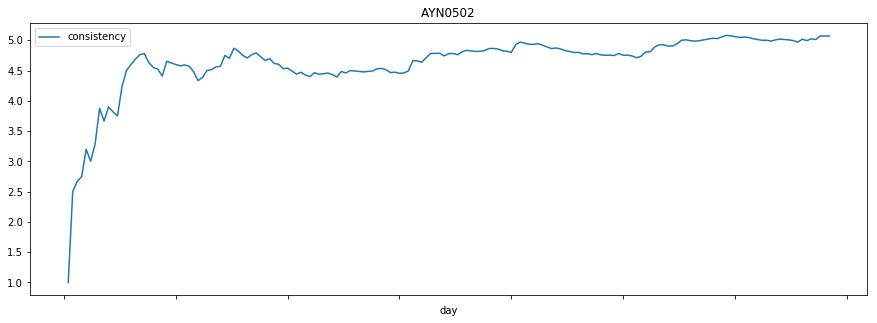

In [17]:
for suspect in df.index[0:20]:
    susEmail[susEmail.user == suspect].groupby("day").offHours.sum()
    suspect1 = pandas.DataFrame(susLogon[susLogon.user == suspect].groupby("day").offHours.sum())
    suspect1.rename(columns={"offHours": "logon"}, inplace=True)
    suspect1["http"] = susHttp[susHttp.user == suspect].groupby("day").offHours.sum() + susHttp[susHttp.user == suspect].groupby("day").money.sum()
    suspect1["email"] = susEmail[susEmail.user == suspect].groupby("day").offHours.sum() + susEmail[susEmail.user == suspect].groupby("day").outside.sum()
    suspect1["device"] = susDevice[susDevice.user == suspect].groupby("day").offHours.sum()

    suspect1 = suspect1.fillna(0.0)
    suspect1["total"] =suspect1.sum(axis=1)
    #suspect1 = suspect1.sort_values("sum", ascending=False)
    suspect1["consistency"] = [ suspect1.total.iloc[:i].mean()for i in range(len(suspect1))]
    suspect1.plot.line(x=suspect1.index, y="consistency", figsize=(15,5), title=suspect)

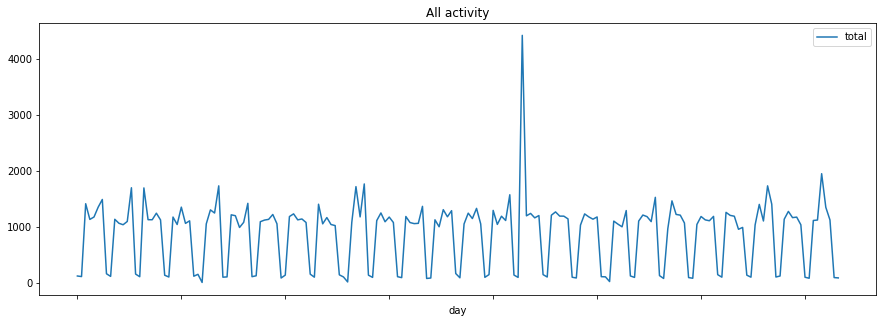

In [18]:
susActivity = pandas.DataFrame(susLogon.groupby("day").offHours.sum())
susActivity.rename(columns={"offHours": "logon"}, inplace=True)
susActivity["http"] = susHttp.groupby("day").offHours.sum() + susHttp.groupby("day").money.sum()
susActivity["email"] = susEmail.groupby("day").offHours.sum() + susEmail.groupby("day").outside.sum()
susActivity["device"] = susDevice.groupby("day").offHours.sum()

susActivity = susActivity.fillna(0.0)
susActivity["total"] =susActivity.sum(axis=1)
#suspect1 = suspect1.sort_values("sum", ascending=False)
susActivity["consistency"] = [ susActivity.total.iloc[i-5:i].mean()for i in range(len(susActivity))]
susActivity.plot.line(x=susActivity.index, y="total", figsize=(15,5), title="All activity")


We also looked at how many computers were being used by each employee. We figured that an employee whose profession doesn't require to access many computers that is spotted using many computers could be flagged as suspicious.

In [19]:
user_pcs = {}
device_user_pcs = {}
http_user_pcs = {}
logon_user_pcs = {}

for index, row in device.iterrows():
    user = row['user']
    if user in user_pcs:
        aset = user_pcs[user]
        aset.add(row['pc'])
        user_pcs[user] = aset    
        if user in device_user_pcs:
            aset2 = device_user_pcs[user]
            aset2.add(row['pc'])
            device_user_pcs[user] = aset2    
    else:
        user_pcs[user] = set([row['pc']])
        device_user_pcs[user] = set([row['pc']])

        
for index, row in http.iterrows():
    user = row['user']
    if user in user_pcs:
        aset = user_pcs[user]
        aset.add(row['pc'])
        user_pcs[user] = aset   
        if user in http_user_pcs:
            aset2 = http_user_pcs[user]
            aset2.add(row['pc'])
            http_user_pcs[user] = aset2     
    else:
        user_pcs[user] = set([row['pc']])
        http_user_pcs[user] = set([row['pc']])

for index, row in logon.iterrows():
    user = row['user']
    if user in user_pcs:
        aset = user_pcs[user]
        aset.add(row['pc'])
        user_pcs[user] = aset
        if user in logon_user_pcs:
            aset2 = logon_user_pcs[user]
            aset2.add(row['pc'])
            logon_user_pcs[user] = aset2
    else:
        user_pcs[user] = set([row['pc']])
        logon_user_pcs[user] = set([row['pc']])

user_pcs

{'AAC0070': {'PC-9582'},
 'AAP0946': {'PC-6599', 'PC-7165'},
 'AAR0716': {'PC-7165', 'PC-8861'},
 'AAS0850': {'PC-5379'},
 'ABG0865': {'PC-0410', 'PC-7165'},
 'ABH0821': {'PC-0924', 'PC-7165'},
 'ABM0089': {'PC-0985'},
 'ABM0173': {'PC-1346'},
 'ABS0125': {'PC-5641'},
 'ABT0490': {'PC-3555'},
 'ABW0271': {'PC-3021'},
 'ACB0077': {'PC-6778'},
 'ACB0393': {'PC-6420'},
 'ACC0950': {'PC-8672'},
 'ACP0847': {'PC-2914'},
 'ACR0100': {'PC-3207'},
 'ACS0457': {'PC-3282'},
 'ACW0546': {'PC-4296'},
 'ACW0801': {'PC-6004'},
 'ADH0427': {'PC-2793'},
 'AEM0896': {'PC-8285'},
 'AGW0029': {'PC-9437'},
 'AHD0110': {'PC-7165', 'PC-9275'},
 'AHM0091': {'PC-8572'},
 'AHS0205': {'PC-7165', 'PC-7191'},
 'AIB0005': {'PC-4488', 'PC-7165'},
 'AJH0410': {'PC-0321', 'PC-7165'},
 'AJL0593': {'PC-0291', 'PC-7165'},
 'AJM0772': {'PC-5855'},
 'AJO0389': {'PC-1738', 'PC-7165'},
 'AJP0155': {'PC-4980'},
 'AJV0013': {'PC-5745', 'PC-7165'},
 'AKB0574': {'PC-5165'},
 'AKP0783': {'PC-7208'},
 'ALB0033': {'PC-5704'},
 'AL

We decided to run k-means with 5 clusters on all the employees based on their suspicous activity parameters. We figured that a suspicious group would arise from one of these clusters.

In [20]:
import sklearn.cluster
import sklearn.manifold

df2 = pandas.DataFrame(df.iloc[:,0:4])


km = sklearn.cluster.KMeans(n_clusters=5)
labels = km.fit_predict(df2)
df2["cluster"] = labels
df2 # ran kmeans with 5 clusters

,offHours,http,email,device,cluster
user,,,,,
FEJ0567,213.0,1232.0,17.0,0.0,4
JGF0556,164.0,1010.0,15.0,50.0,4
JVS0212,1098.0,0.0,67.0,0.0,3
LUP0038,1092.0,2.0,63.0,0.0,3
NLP0555,127.0,994.0,9.0,0.0,4
HKW0211,1071.0,2.0,52.0,0.0,3
DWG0209,1019.0,9.0,76.0,0.0,3
ZNS0213,1038.0,2.0,35.0,0.0,3
PAW0040,995.0,3.0,76.0,0.0,3


We used MDS to flatten the parameters into 2 dimensions in order to visualize the data in a scatter plot.

In [ ]:
mds = sklearn.manifold.MDS(n_components=2, dissimilarity='euclidean', max_iter = 1000)
data2D = mds.fit_transform(df2.copy())
df3 = pandas.DataFrame(data2D, columns=["x", "y"])
df3.index = df2.index
df3["cluster"] = labels

plt  = df3.plot.scatter(x = "x", y = "y", c = "cluster", colormap = matplotlib.pyplot.cm.Paired, sharex = False)
plt

After noticing the suspicious behavior of user CSF0929 we decided to run a TFIDF with each date being considered a different document and the domains of the websites he visited to be the words. We wanted to find for each day which website best 

In [ ]:
import re
from collections import Counter
from urllib.parse import urlparse
http['clean'] = http.url.apply(lambda t: t.lower())
http['clean'] = http.url.apply(lambda t: urlparse(t).netloc)
http['day'] = http.date.apply(lambda t: t.split()[0])
#data
httpDate = http[http.user== "CSF0929"].groupby("day")
domains = httpDate.clean.aggregate(" ".join)

http

In [ ]:
domains
TF = domains.apply(lambda t: pandas.Series(t.split(" ")).value_counts())
TF
#TF = TF.loc[:,TF.sum()>5]
#TF
D = len(TF.index)
D
IDF = numpy.log(D/TF.count())
IDF
TFIDF = TF *IDF
TFIDF = TFIDF.fillna(0.0)
TFIDF.idxmax(axis=1)